## Download a csv from a jupyter notebook

```python
from IPython.display import HTML
import base64  
import pandas as pd  

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(index =False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

# Introduction

This first project is an introduction to ``pandas``, the most popular data-management tool in Python.

Pandas is our swiss knife when it comes to Data Analysis/Science in Python. We use it to:

- **Load/dump read/write data**: to and from different formats (CSV, XML, HTML, Excel, JSON, even from the Internet)
- **Analyze data**: perform statistical analysis, query the data, find inconsistencies, etc
- **Data cleaning**: finding missing values, duplicate data, invalid or broken values, etc
- **Visualizations**: with support from ``matplotlib``, we can quickly visualize data
- **Data Wrangling/Munging**: a non-so-scientific term that involves data handling: merging multiple data sources, creating derived representations, grouping data, etc.

In this project you will not learn much about how to use Pandas, but you'll see it in action. So, don't worry if you don't feel comfortable "doing" what's shown here, it'll all be explained in the following projects.

Let's get started! Switch to the next page and start your lab!

## Loading the data

Have you started your lab? If you haven't yet, please go ahead and start the lab. Also, execute the first couple of cells:

```python
import pandas as pd
df = pd.read_csv("s&p500.csv", index_col='Date', parse_dates=True)
df.head()
df.tail()
```

We first start importing the ``pandas`` library, and as we use it SO much, we like to create a short alias ``pd``. We then load the sample dataset for this project: the S&P500 index from 2017 to 2022.

We load the data using the ``read_csv`` method. Throughout these labs, you'll see that pandas can load data from a lot of different formats, and methods are usually ``read_XXX``; for example: ``read_json``, ``read_excel``, ``read_xml``, etc.

We've now loaded the data contained in the CSV into the variable ``df``: a DataFrame. DataFrames are the key data structure used by Pandas and you'll see A LOT of them in the following projects; so, don't worry too much about it for now.

Then, we take a few quick peeks at the data with the ``.head()`` and ``.tail()`` methods. This is because pandas is prepared to handle MILLIONS of rows (or even more). So we don't usually "print" the whole data, we just take quick peeks at it.

The ``.head()`` method shows the first 5 rows, the ``.tail()`` method shows the last 5 rows. You can immediately see that the DataFrame looks pretty much like an Excel table. It contains an index, which is the date of the reading.

In [2]:
import pandas as pd

df = pd.read_csv("SP500 index 2017 2022.csv", index_col='Date', parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3219730000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000
2022-12-29,3805.449951,3858.189941,3805.449951,3849.280029,3849.280029,3003680000
2022-12-30,3829.060059,3839.850098,3800.340088,3839.500000,3839.500000,2979870000


## Analyzing data

The analysis phase is of course dependant of the task at hand, and the data at hand. This is just an example of the capabilities of pandas.

We start by using the ``.describe()`` method, that provides quick summary statistics of the whole DataFrame. We have information like the ``mean`` (the average), ``max``, etc.

We can also get specific information for a single column: ``df['Close'].min()`` or ``df['Close'].max()``. Oh, by the way, you've just seen how to perform "single column selection": ``df['Close'].head()``.

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,3283.215944,3301.894648,3262.660734,3283.391821,3283.391821,4.096083e+09
std,716.906855,722.545366,710.808656,716.838804,716.838804,1.054008e+09
min,2251.570068,2263.879883,2191.860107,2237.399902,2237.399902,1.296530e+09
25%,2713.589966,2729.655090,2697.770020,2712.177429,2712.177429,3.418972e+09
50%,3006.380005,3016.780029,2991.500000,3005.584961,3005.584961,3.858670e+09
75%,3919.070007,3945.934998,3892.040039,3916.182434,3916.182434,4.526435e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,9.976520e+09


Single column statistics

In [7]:
df['Close'].min()

2237.39990234375

In [8]:
df['Close'].max()

4796.56005859375

Single column selection:

In [9]:
df['Close'].head()

Date
2017-01-03    2257.830078
2017-01-04    2270.750000
2017-01-05    2269.000000
2017-01-06    2276.979980
2017-01-09    2268.899902
Name: Close, dtype: float64

## Visualizations

Pandas makes it simple to visualize data with the ``.plot()`` method. In reality, ``.plot()`` is just a wrapper around ``matplotlib``, the de-facto plotting library for Python.

As you can see, plotting a column is very easy; just: ``df['Close'].plot()``.

You can see that we're creating more advanced visualizations by combining multiple columns or by creating statistical visualizations (box plots, histograms, etc).

<Axes: title={'center': 'S&P Closing Price | 2017 - 2022'}, xlabel='Date'>

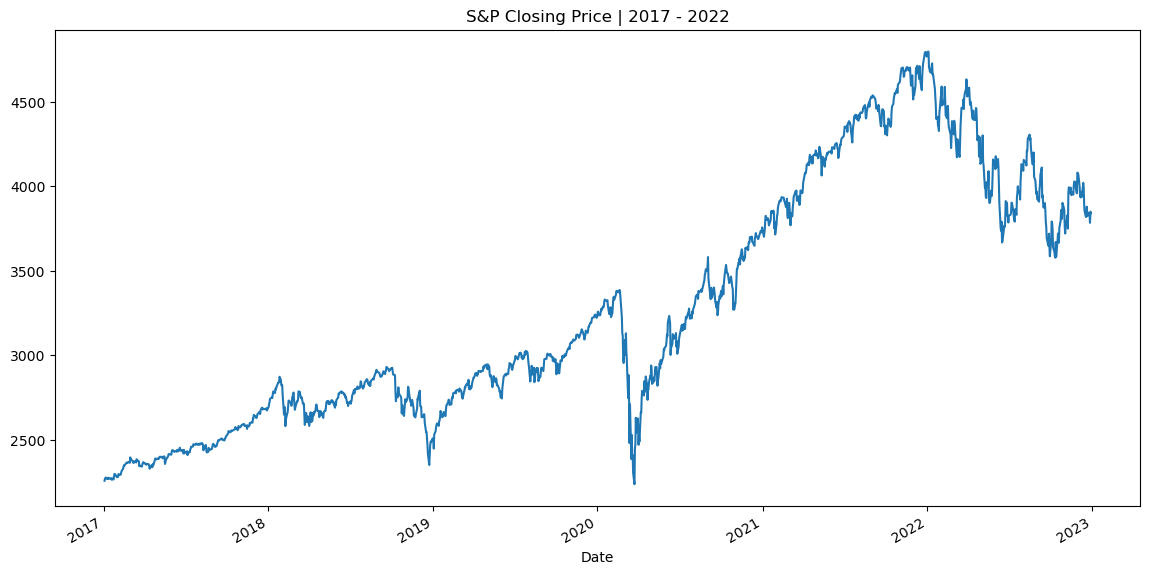

In [10]:
df['Close'].plot(figsize=(14, 7), title='S&P Closing Price | 2017 - 2022')

A more advanced chart combining ``Close Price`` and ``Volume``:

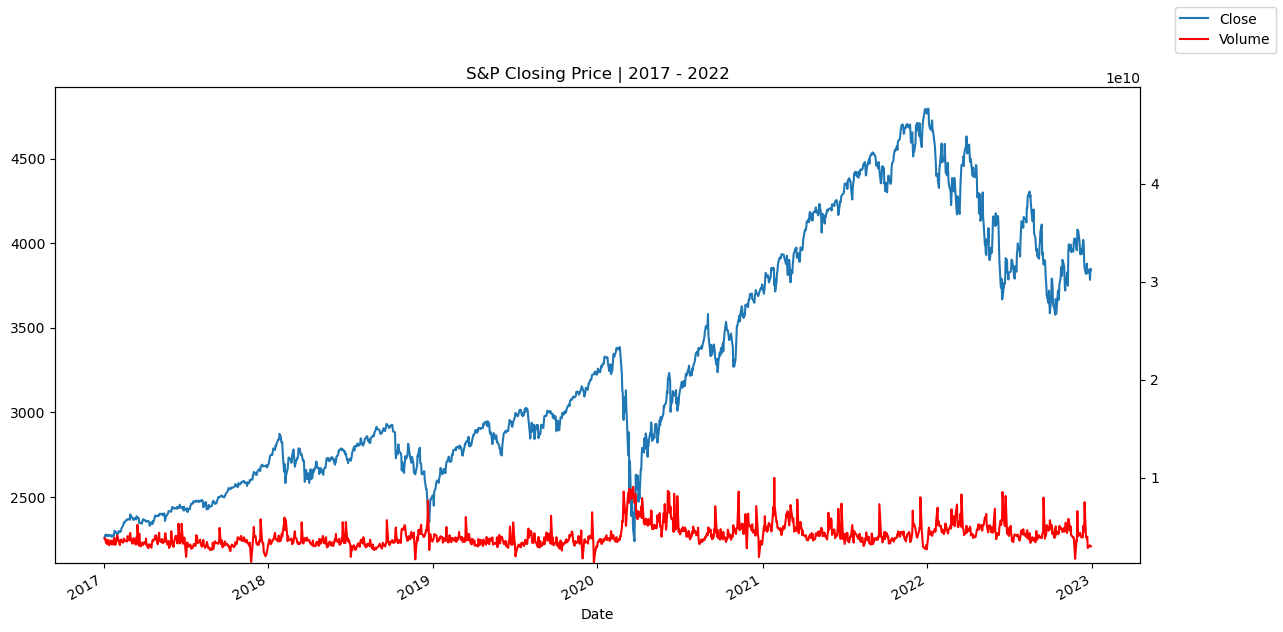

In [11]:
ax1 = df['Close'].plot(figsize=(14, 7), title='S&P Closing Price | 2017 - 2022')

ax2 = ax1.twinx()
df['Volume'].plot(ax=ax2, color='red', ylim=[df['Volume'].min(), df['Volume'].max() * 5])

ax1.figure.legend(["Close", "Volume"])

A few statistical visualizations.

A histogram:

<Axes: ylabel='Frequency'>

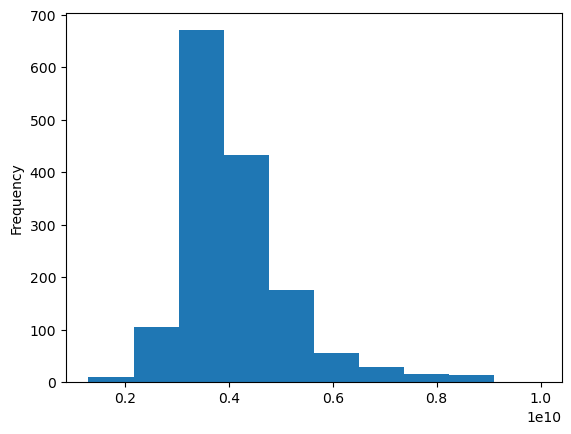

In [12]:
df['Volume'].plot(kind='hist')

A box plot:

<Axes: >

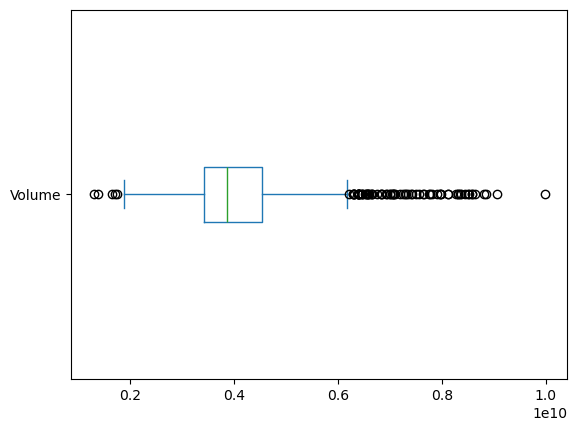

In [14]:
df['Volume'].plot(kind='box', vert=False)

## Data Wrangling

Pandas excels at Data Wrangling/handling/munging. We can perform a ton of operations, like combining datasets, grouping, melting, creating pivot tables, etc. We have an entire Skill Track just dedicated to Data Wrangling, so you can guess how powerful it is.

For now, we'll focus on just a few simple operations. We'll calculate [Bollinger Bands](https://en.wikipedia.org/wiki/Bollinger_Bands) for our S&P500 data.

Bollinger bands are just a simple visualization/analysis technique that creates two bands, one "roof" and one "floor" of some "support" for a given time series. The reasoning is that, if the time series is "below" the "floor", it's a historic low, and if it's "above" the "roof", it's a historic high. In terms of stock prices and other financial instruments, when the price crosses a band, it's said to be too cheap or too expensive.

> **This is definitively NOT investment advice. Bollinger bands have proved to be INACCURATE, so don't use them in real life. This is just for educational purposes.**

A Bollinger band is defined as two standard deviations above/below the Simple Moving Average. Those are a lot of concepts, but basically we can first define the Simple Moving Average, using the ``.rolling(WINDOW).mean()`` method (switch to the lab to follow along).

Understanding the SMA is outside of the scope of this project, but it's basically a "smoothing" method. You see how the SMA *follows* the Close Price, but without so much volatility.

Now, to define the bands we need to calculate 2 standard deviations above/below the price:

```python
df['Lower Band'] = df['Close SMA'] - (2 * df['Close'].rolling(60).std())
df['Upper Band'] = df['Close SMA'] + (2 * df['Close'].rolling(60).std())
```

The final result should look something like:

In [16]:
df['Close SMA'] = df['Close'].rolling(60).mean()

Comparamos el nuevo SMA con el valor de cierre de la acción

In [17]:
df[['Close', 'Close SMA']].tail(10)

,Close,Close SMA
Date,,
2022-12-16,3852.360107,3835.480680
2022-12-19,3817.659912,3837.554513
2022-12-20,3821.620117,3840.330847
2022-12-21,3878.439941,3844.183346
2022-12-22,3822.389893,3845.905843
2022-12-23,3844.820068,3849.311678
2022-12-27,3829.250000,3853.372176
2022-12-28,3783.219971,3855.118677
2022-12-29,3849.280029,3856.091178
